In [ ]:
4/1AX4XfWhNCwSdVNbS9q60Sd_5S9mR5gW5U_JgeWcJj_VOyUsQhZCohw_gIyQ

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Undergraduate_Thesis/data

Mounted at /gdrive
/gdrive/MyDrive/Undergraduate_Thesis/data


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("dengue_features_train.csv")
print(df.head())

  city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0   sj  1990          18  ...               20.0               16.0            4
1   sj  1990          19  ...               22.2                8.6            5
2   sj  1990          20  ...               22.8               41.4            4
3   sj  1990          21  ...               23.3                4.0            3
4   sj  1990          22  ...               23.9                5.8            6

[5 rows x 25 columns]


This is a prediction model, with 'total_cases' as the response variable


In [4]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [5]:
df.dropna(inplace=True)
#we lost 257 rows by dropping NaN's
df['total_cases'].count()


1199

Identify columns and split data set by cities

In [6]:
for i in range(len(df.columns)):
  print(str(i) + ": "+ df.columns[i])

df_sj = df.loc[df['city'] == 'sj']
df_iq = df.loc[df['city'] == 'iq']

0: city
1: year
2: weekofyear
3: week_start_date
4: ndvi_ne
5: ndvi_nw
6: ndvi_se
7: ndvi_sw
8: precipitation_amt_mm
9: reanalysis_air_temp_k
10: reanalysis_avg_temp_k
11: reanalysis_dew_point_temp_k
12: reanalysis_max_air_temp_k
13: reanalysis_min_air_temp_k
14: reanalysis_precip_amt_kg_per_m2
15: reanalysis_relative_humidity_percent
16: reanalysis_sat_precip_amt_mm
17: reanalysis_specific_humidity_g_per_kg
18: reanalysis_tdtr_k
19: station_avg_temp_c
20: station_diur_temp_rng_c
21: station_max_temp_c
22: station_min_temp_c
23: station_precip_mm
24: total_cases


San Juan data correlation matrix

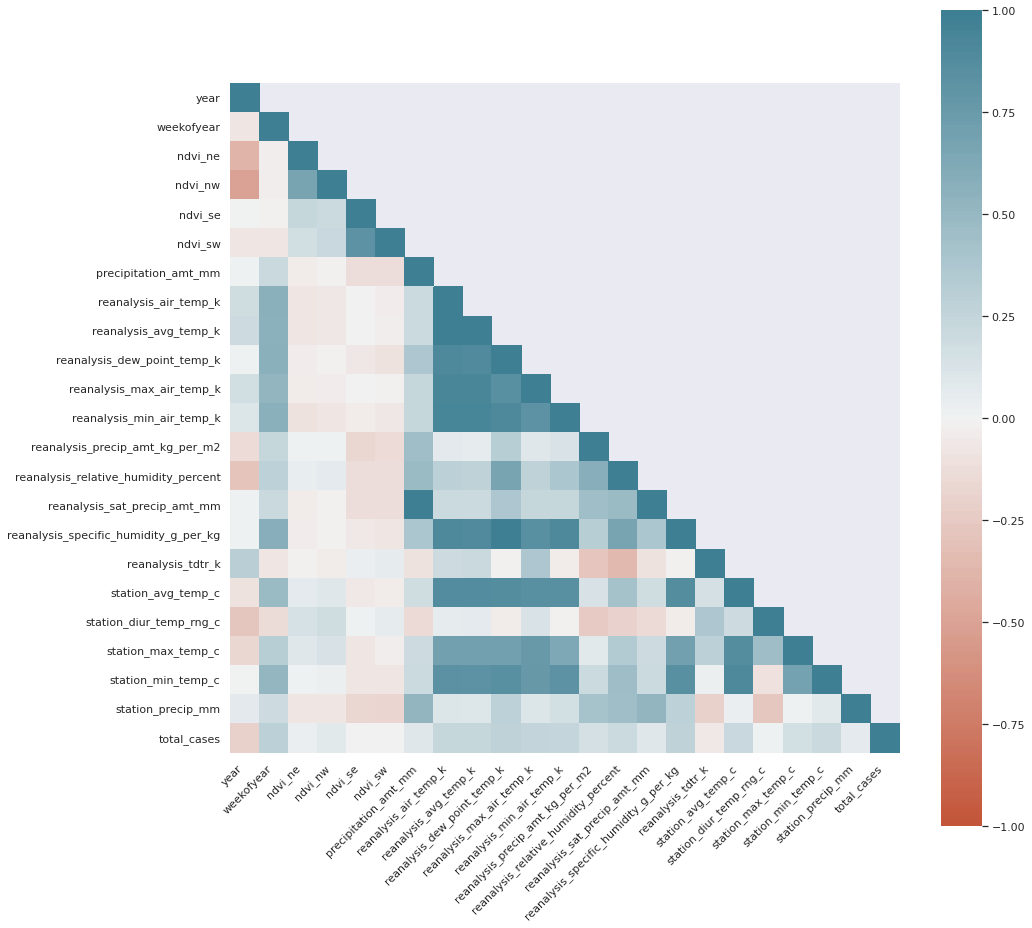

In [7]:
corr = df_sj.corr()
sns.set(rc = {'figure.figsize':(15,15)})
mask = np.triu(np.ones_like(corr, dtype=bool),1)
ax = sns.heatmap(
    corr, 
    vmin =-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True,
    mask = mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

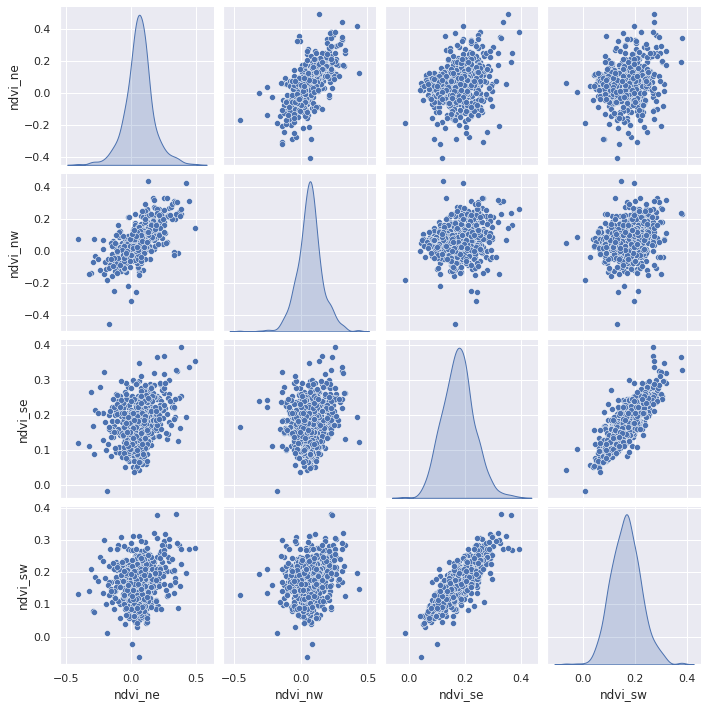

In [8]:
dfPair_ndvi_sj = df_sj.iloc[:,4:8]
#print(dfPair_ndvi.head())
sns.pairplot(dfPair_ndvi_sj, diag_kind='kde')

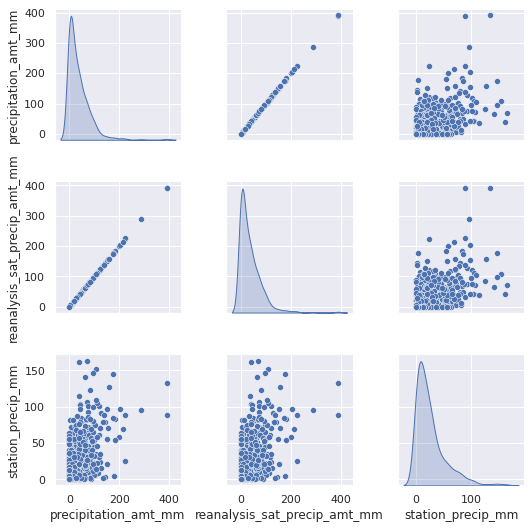

In [9]:
dfPair_precipitations_sj = df_sj.iloc[: ,[8,16,23]]
#print(dfPair_precipitations.head())
sns.pairplot(dfPair_precipitations_sj, diag_kind='kde')

The above shows something interesting, 'precipitation_amt_mm' and 'reanalysis_sat_precip_amt_mm' are 1:1 but are not perfectly correlated with
'station_precip_mm'


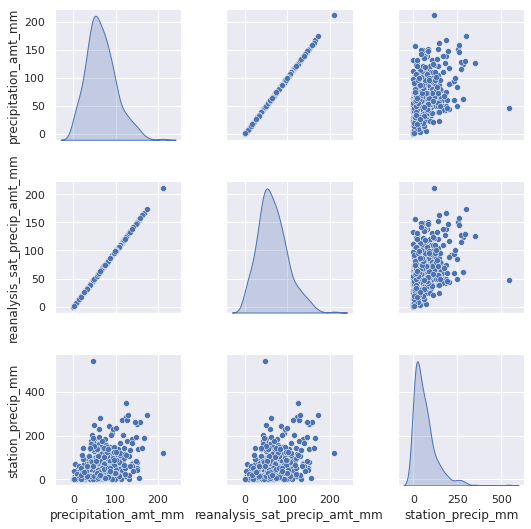

In [10]:
dfPair_precipitations_iq = df_iq.iloc[: ,[8,16,23]]
#print(dfPair_precipitations.head())
sns.pairplot(dfPair_precipitations_iq, diag_kind='kde')

Since 'precipitation_amt_mm' and 'reanalysis_sat_precip_amt_mm' are perfectly correlated, I will drop 'precipitation_amt_mm'


In [12]:
df.drop('precipitation_amt_mm', axis=1,inplace=True)
df_sj = df.loc[df['city'] == 'sj']
df_iq = df.loc[df['city'] == 'iq']

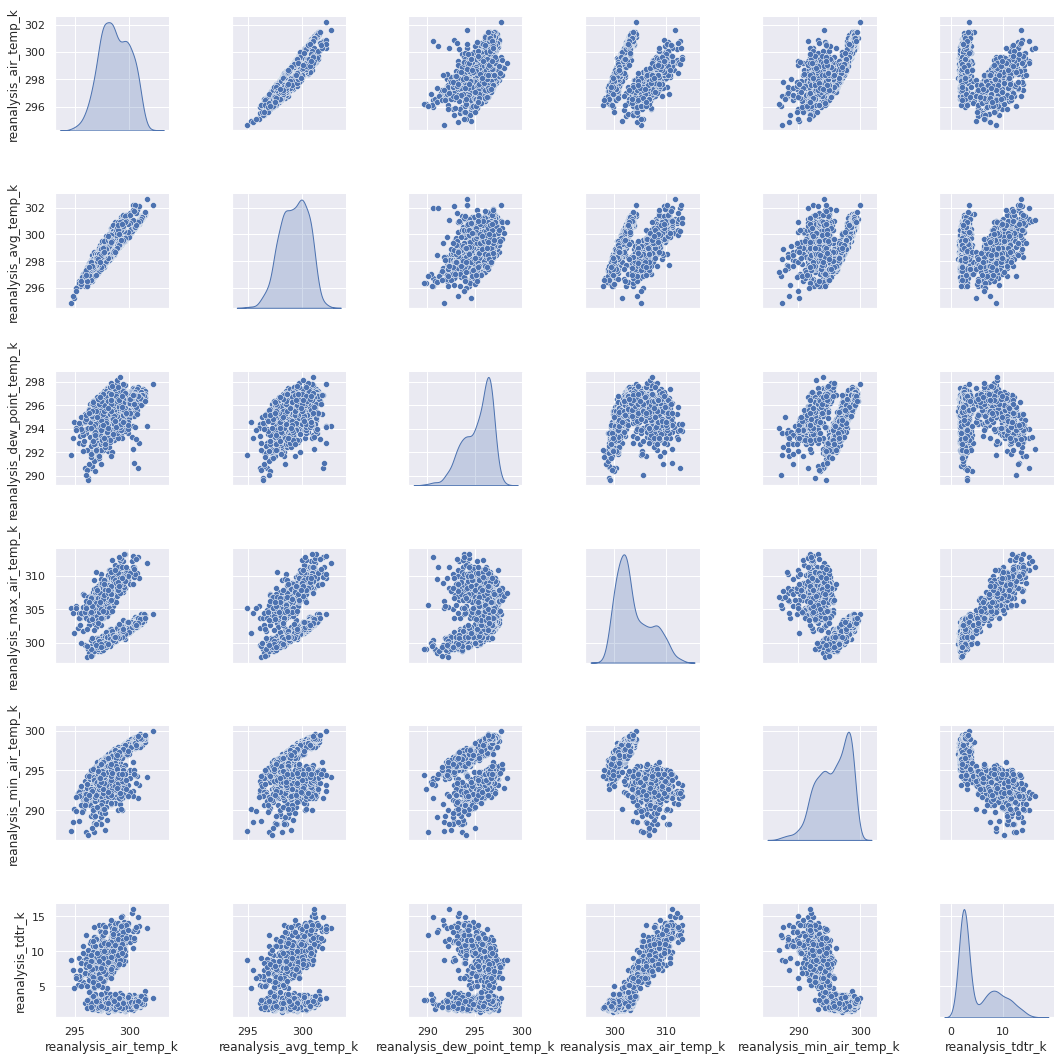

In [11]:
dfPair_temperatures = df.iloc[: ,[9,10,11,12,13,18]]
#print(dfPair_precipitations.head())
sns.set(rc = {'figure.figsize':(15,15)})
sns.pairplot(dfPair_temperatures, diag_kind='kde')

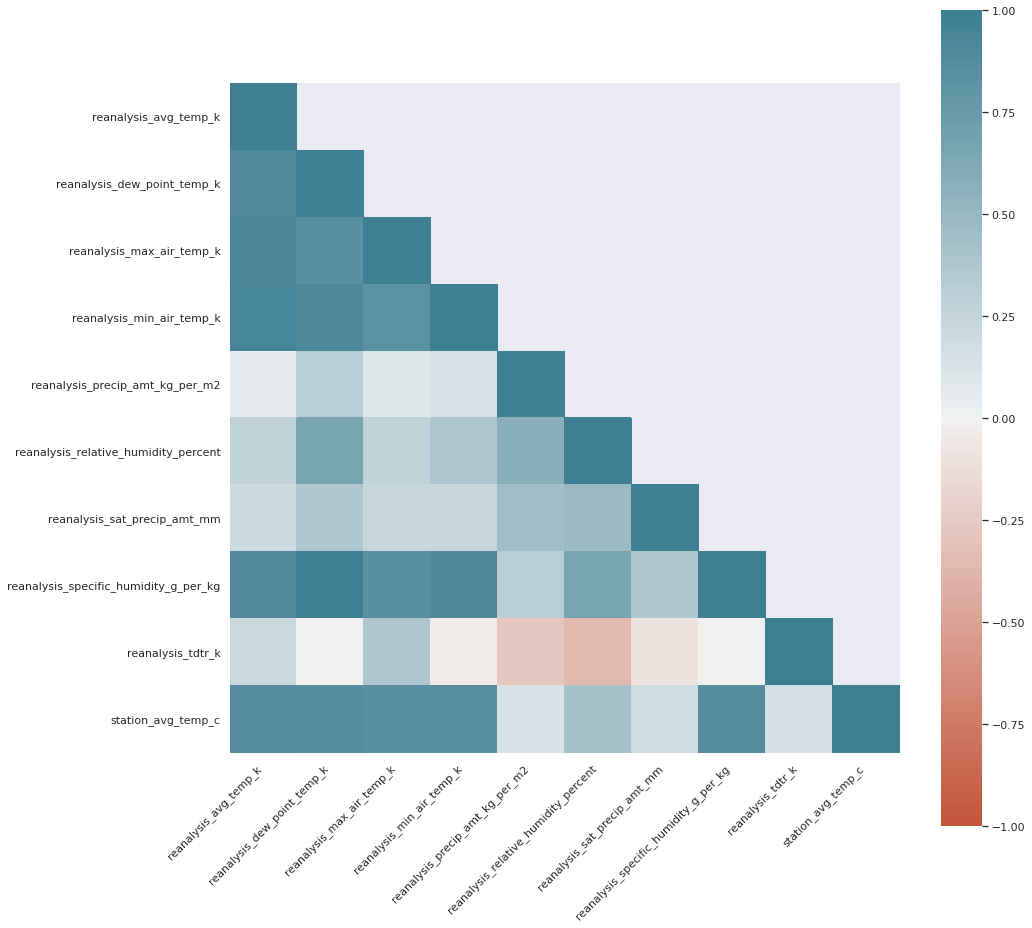

In [13]:
df_reanalysis_sj = df_sj.iloc[:,9:19]
corr = df_reanalysis_sj.corr()

mask = np.triu(np.ones_like(corr, dtype=bool),1)
ax = sns.heatmap(
    corr, 
    vmin =-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True,
    mask = mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

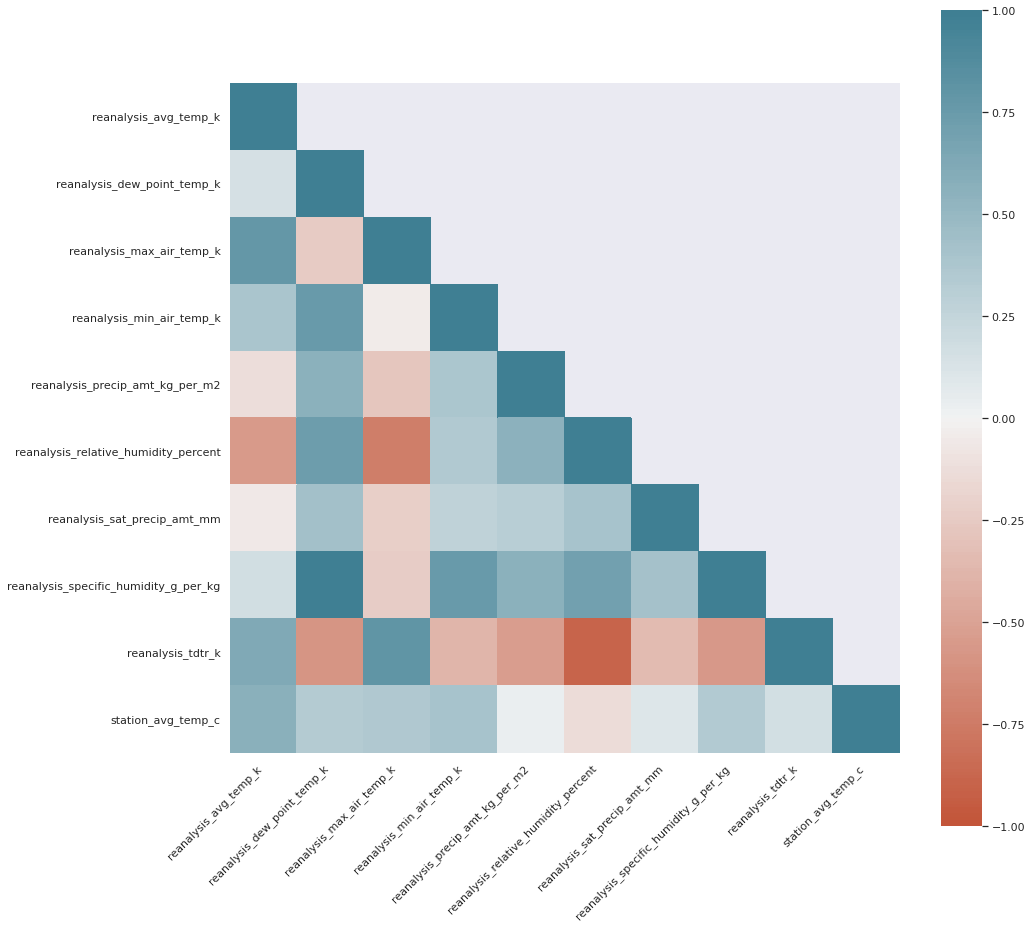

In [14]:
df_reanalysis_iq = df_iq.iloc[:,9:19]
corr = df_reanalysis_iq.corr()
sns.set(rc = {'figure.figsize':(15,15)})
mask = np.triu(np.ones_like(corr, dtype=bool),1)
ax = sns.heatmap(
    corr, 
    vmin =-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True,
    mask = mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);